In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [2]:
# Function to parse the gzipped file and yield reviews one at a time
def parse_txtgz(file_name, num_lines=100):
    with gzip.open(file_name, 'rt', encoding='utf-8') as file:
        review = {}
        count = 0  # Track the number of reviews processed

        # Loop through each line and parse
        for line in file:
            line = line.strip()
            if line:  # Skip empty lines
                # Split by colon to separate field name and value
                if ": " in line:
                    key, value = line.split(": ", 1)
                    review[key] = value
            else:
                # End of a review entry
                if review:
                    yield review  # Yield the parsed review
                    review = {}  # Reset for the next review
                    count += 1

                    # If num_lines is specified and reached, stop processing
                    if num_lines is not None and count >= num_lines:
                        return

        # Add the last review if it's not empty and num_lines isn't exceeded
        if review and (num_lines is None or count < num_lines):
            yield review


# Beer Advocate dataset analysis

Notes about the dataset:
- ratings and review

In [3]:
# load data
number_lines = 100

if 'beers_df' not in globals():
    beers_df_iter = pd.read_csv('BeerAdvocate/beers.csv', chunksize=number_lines)
    beers_df = pd.concat(beers_df_iter)
    print("beers_df loaded")
if 'breweries_df' not in globals():
    breweries_df_iter = pd.read_csv('BeerAdvocate/breweries.csv', chunksize=number_lines)
    breweries_df = pd.concat(breweries_df_iter)
    print("breweries_df loaded")
if 'users_df' not in globals():
    users_df_iter = pd.read_csv('BeerAdvocate/users.csv', chunksize=number_lines)
    users_df = pd.concat(users_df_iter)
    print("users_df loaded")
if 'reviews_df' not in globals():
    file_path = 'BeerAdvocate/reviews.txt.gz'
    chunks = []
    for chunk in parse_txtgz(file_path, num_lines=number_lines):
        chunks.append(chunk)
    reviews_df = pd.DataFrame(chunks)
    print("reviews_df loaded")
if 'ratings_df' not in globals():
    file_path = 'BeerAdvocate/ratings.txt.gz'
    chunks = []
    for chunk in parse_txtgz(file_path, num_lines=number_lines):
        chunks.append(chunk)
    ratings_df = pd.DataFrame(chunks)
    print("ratings_df loaded")



beers_df loaded
breweries_df loaded
users_df loaded
reviews_df loaded
ratings_df loaded


In [4]:
beers_df.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [5]:
breweries_df.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [6]:
users_df.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [7]:
reviews_df.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


In [8]:
ratings_df.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True


In [9]:
print("beers_df",beers_df.columns)
print("breweries_df",breweries_df.columns)
print("users_df",users_df.columns)
print("reviews_df",reviews_df.columns)
print("ratings_df",ratings_df.columns)

"""beers_df Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
breweries_df Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
users_df Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
reviews_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'],
      dtype='object')
ratings_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')
"""

beers_df Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
breweries_df Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
users_df Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
reviews_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'],
      dtype='object')
ratings_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')


"beers_df Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',\n       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',\n       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',\n       'avg_matched_valid_ratings'],\n      dtype='object')\nbreweries_df Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')\nusers_df Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',\n       'location'],\n      dtype='object')\nreviews_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',\n       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',\n       'taste', 'overall', 'rating', 'text'],\n      dtype='object')\nratings_df Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',\n       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',\n       'taste', 'overall', 'rating', 'text', 'review'],\n      dtype='object')\n"

## Most Popular Beer Styles

/tmp/ipykernel_50153/3620793565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


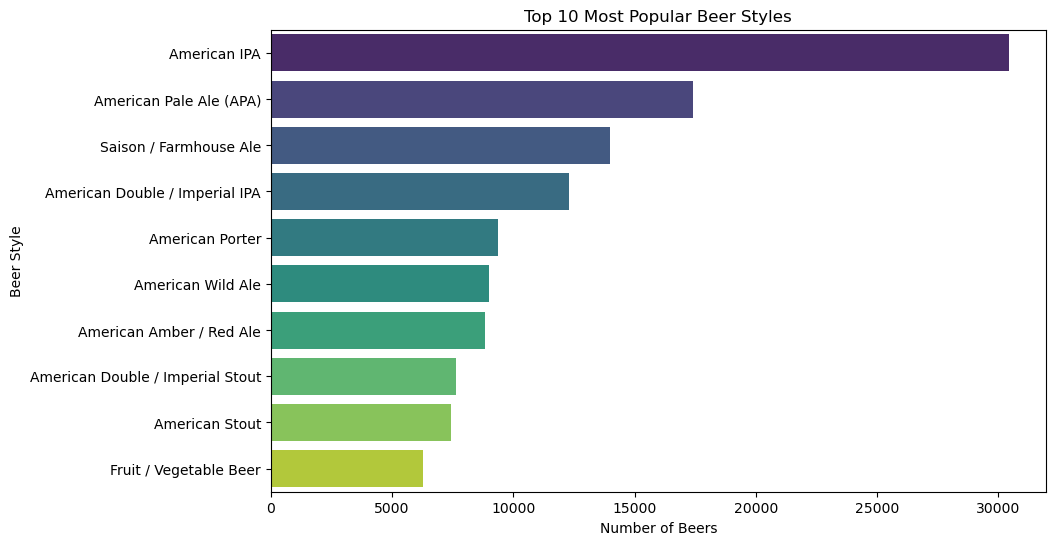

In [10]:
# Count beers by style
style_counts = beers_df['style'].value_counts().head(10)  # Top 10 beer styles

plt.figure(figsize=(10,6))
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Top 10 Most Popular Beer Styles")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()


## Distribution of ABV

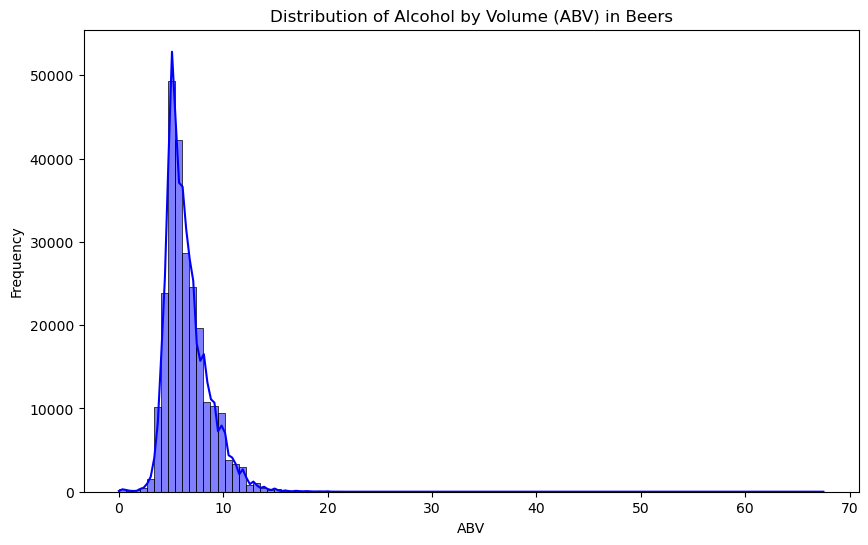

In [11]:
# Plot the distribution of ABV
plt.figure(figsize=(10,6))
sns.histplot(beers_df['abv'].dropna(), kde=True, color='blue', bins=100)
plt.title("Distribution of Alcohol by Volume (ABV) in Beers")
plt.xlabel("ABV")
plt.ylabel("Frequency")
plt.show()


## Correlation Between Scores (ba_score, avg, bros_score)

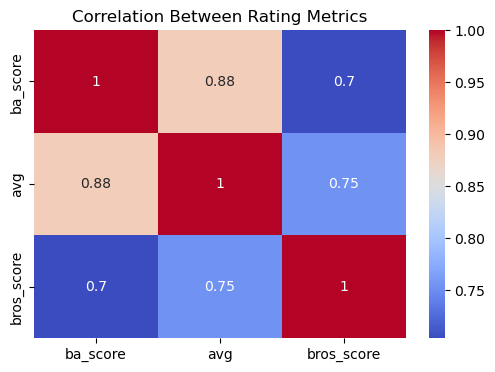

In [12]:
# Correlation matrix of ratings
correlation_matrix = beers_df[['ba_score', 'avg', 'bros_score']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Rating Metrics")
plt.show()


## Most Prolific Breweries

In [13]:
# Check the initial breweries DataFrame
print(breweries_df.head())

# Check after dropping duplicates
unique_breweries = breweries_df[['name','id', 'nbr_beers']].drop_duplicates(subset='id')
print(unique_breweries.head())

# Check the top breweries after sorting
top_breweries = unique_breweries.sort_values(by='nbr_beers', ascending=False).head(10)
print(top_breweries)

      id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2
                     name     id  nbr_beers
0  Abdysh-Ata (Абдыш Ата)  39912          5
1             Arpa (АРПА)  39913          1
2               Bear Beer  39914          4
3             Blonder Pub  39915          4
4            Kellers Bier  39916          2
                                                  name     id  nbr_beers
10691               Rock Bottom Restaurant and Brewery   2837       1196
14031               Rock Bottom Restaurant and Brewery  16083       1196
15759                 Rock Bottom Restaurant & Brewery   1099       1196
10542     Rock Bottom Restaurant & Brewery - Arrowhead   1100       1196
8106                  Rock Bottom R

/tmp/ipykernel_50153/3315701811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_breweries['nbr_beers'], y=top_breweries['name'] + " - " + top_breweries["id"].astype(str), palette="coolwarm")


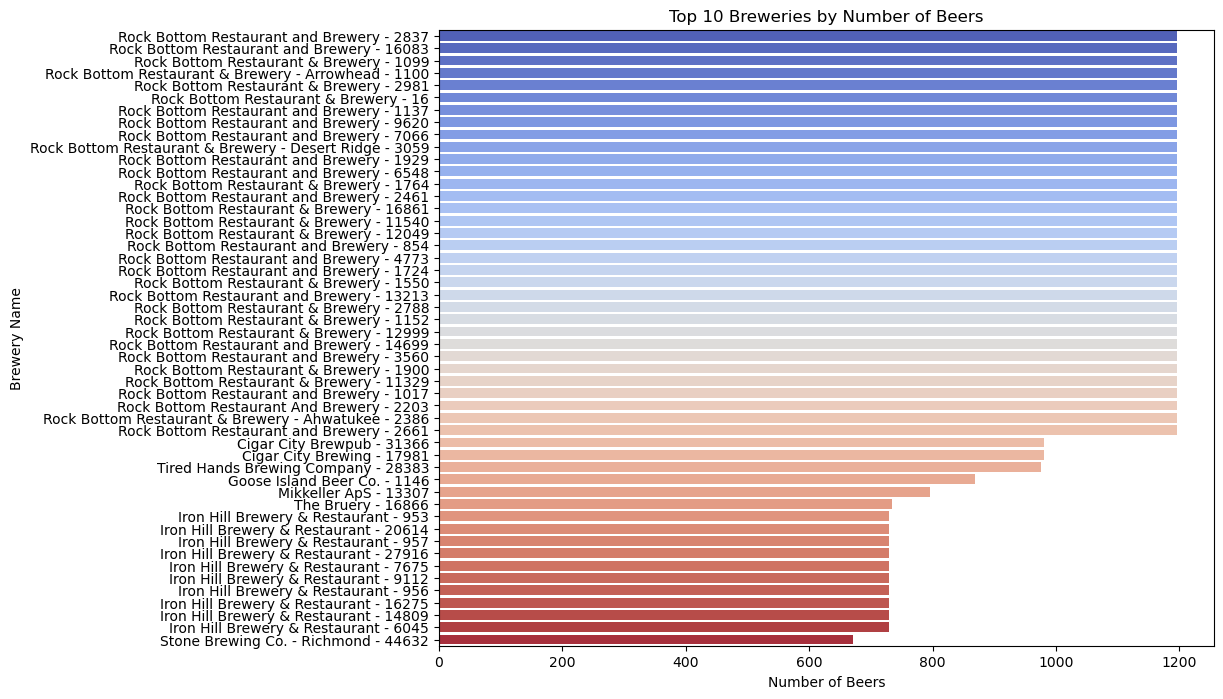

In [14]:
# Top breweries by number of beers
top_breweries = breweries_df[['name','id', 'nbr_beers']].drop_duplicates(subset='id').sort_values(by='nbr_beers', ascending=False).head(50)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x=top_breweries['nbr_beers'], y=top_breweries['name'] + " - " + top_breweries["id"].astype(str), palette="coolwarm")
plt.title("Top 10 Breweries by Number of Beers")
plt.xlabel("Number of Beers")
plt.ylabel("Brewery Name")
plt.show()


## Geographical Distribution of Breweries

/tmp/ipykernel_50153/3448000023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette="flare")


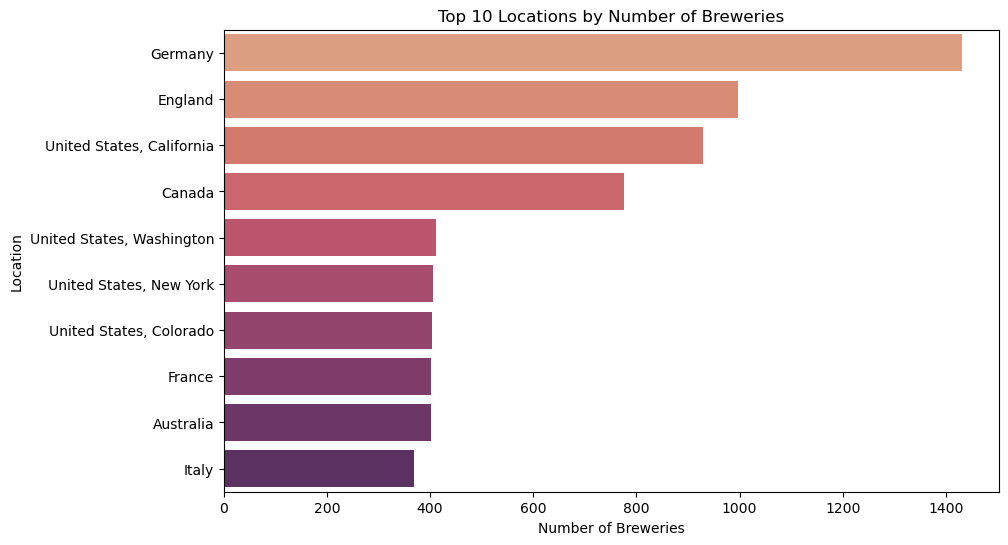

In [15]:
# Count breweries by location
location_counts = breweries_df['location'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="flare")
plt.title("Top 10 Locations by Number of Breweries")
plt.xlabel("Number of Breweries")
plt.ylabel("Location")
plt.show()


## Most Active Users

/tmp/ipykernel_50153/3345521593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_active_users['nbr_ratings'], y=most_active_users['user_name'], palette="Set2")


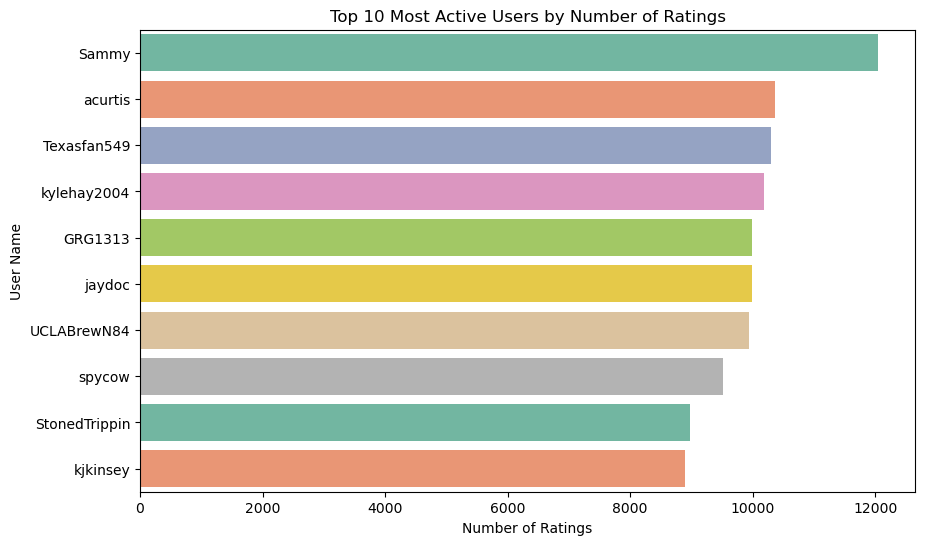

In [16]:
# Sort users by 'nbr_ratings'
most_active_users = users_df[['user_name', 'nbr_ratings']].sort_values(by='nbr_ratings', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=most_active_users['nbr_ratings'], y=most_active_users['user_name'], palette="Set2")
plt.title("Top 10 Most Active Users by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("User Name")
plt.show()


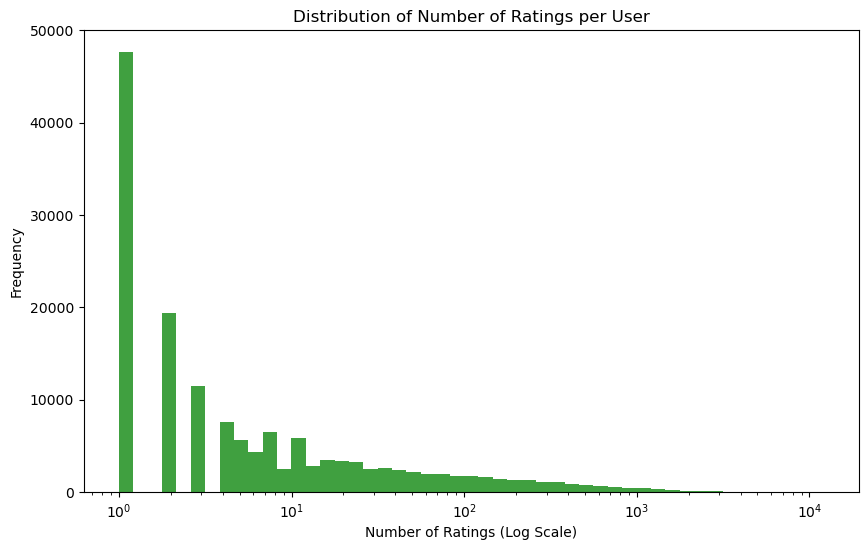

In [17]:
# histogram of number of ratings per user
plt.figure(figsize=(10,6))
bins = np.logspace(np.log10(users_df['nbr_ratings'].min()), np.log10(users_df['nbr_ratings'].max()), 50)
sns.histplot(users_df['nbr_ratings'], color='green', bins=bins)
plt.xscale('log')
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings (Log Scale)")
plt.ylabel("Frequency")
plt.show()

## Review Distribution by Category

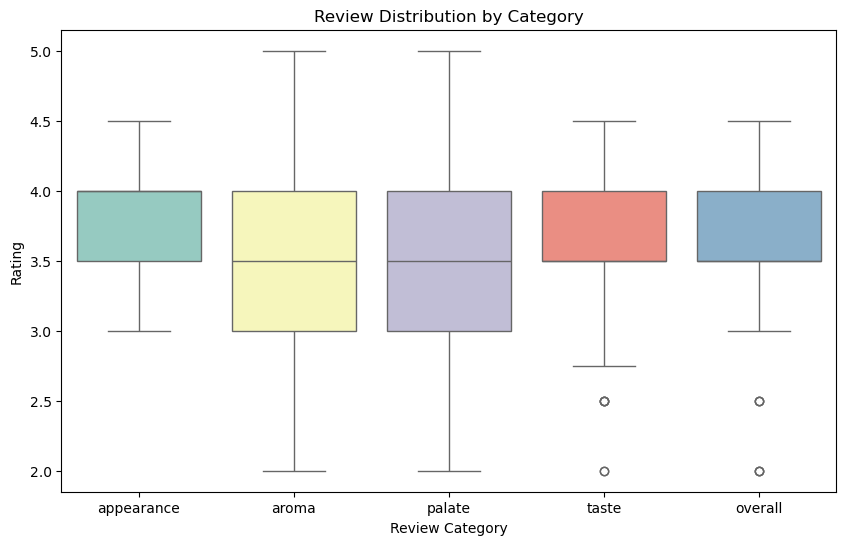

In [18]:
# Boxplot of review categories
review_columns = ['appearance', 'aroma', 'palate', 'taste', 'overall']
reviews_df[review_columns] = reviews_df[review_columns].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10,6))
sns.boxplot(data=reviews_df[review_columns], palette="Set3")
plt.title("Review Distribution by Category")
plt.xlabel("Review Category")
plt.ylabel("Rating")
plt.show()

In [19]:
print(reviews_df["appearance"].unique())

[3.25 3.   4.   4.25 4.5  3.5  3.75]


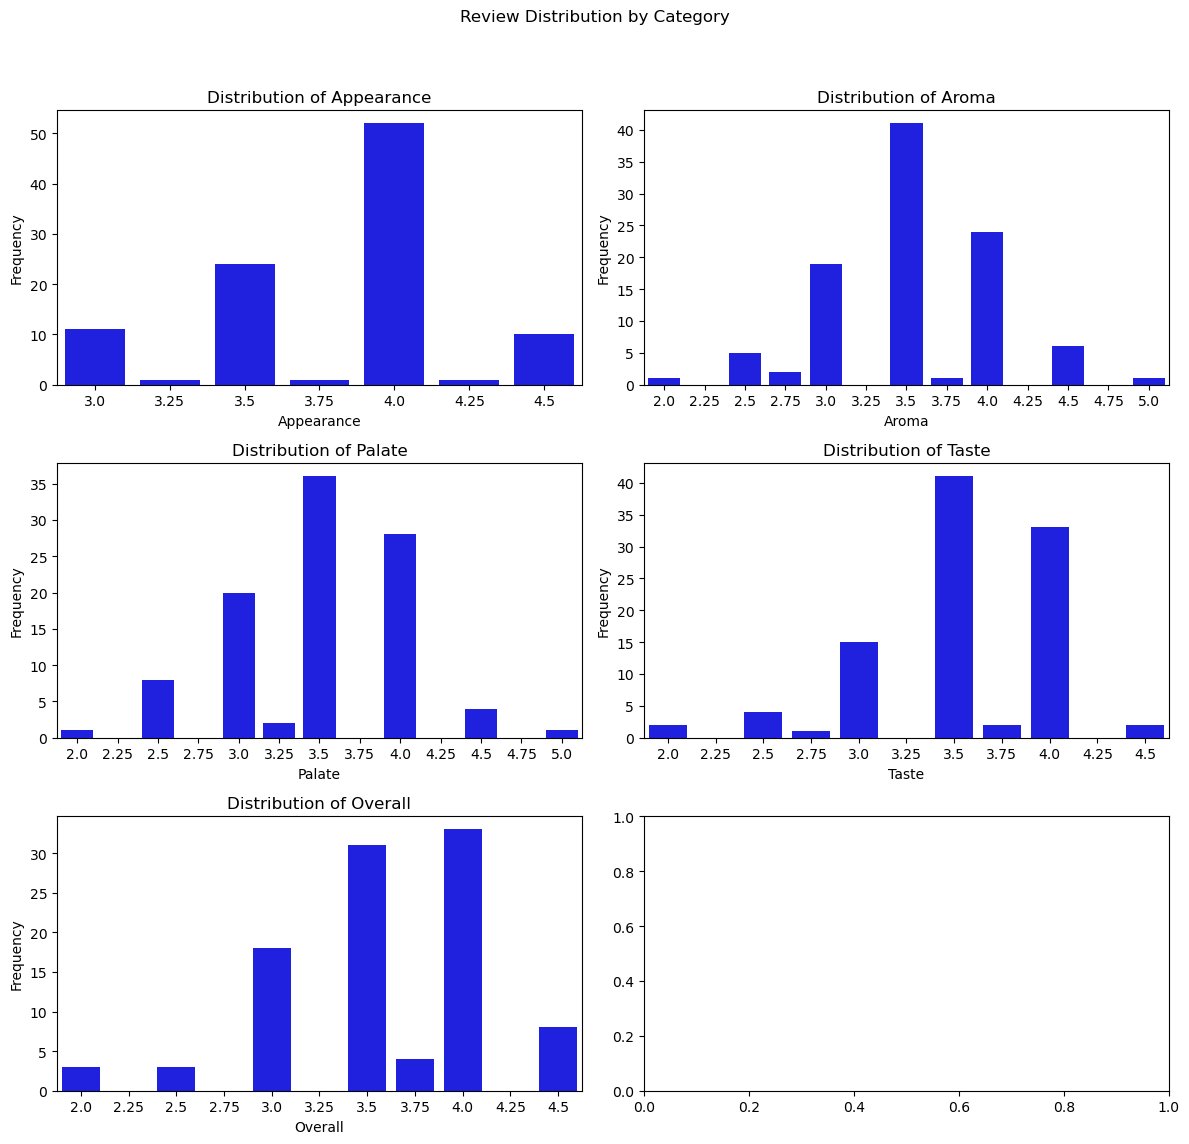

In [20]:
# plot a histogram of each category as multiple figures in a single plot. note that the possible values are finite and discrete
import numpy as np

for col in review_columns:
    reviews_df[col] = (reviews_df[col] // 0.25 * 0.25).astype(float)  # Discretize to 0.25 intervals

# Create the subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Adjust the layout as per the number of columns
fig.suptitle("Review Distribution by Category")

# Plotting
for i, col in enumerate(review_columns):
    sns.countplot(x=reviews_df[col].dropna(), color='blue', ax=axes[i//2, i%2], order=np.arange(reviews_df[col].min(), reviews_df[col].max()+0.25, 0.25))
    
    # Set the title and labels
    axes[i//2, i%2].set_title(f"Distribution of {col.capitalize()}")
    axes[i//2, i%2].set_xlabel(col.capitalize())
    axes[i//2, i%2].set_ylabel("Frequency")
    
    # Set x-axis limits to min and max values
    # axes[i//2, i%2].set_xlim(reviews_df[col].min(), reviews_df[col].max())

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the title
plt.show()

## Some stats about the dataset

In [21]:
# Numerical stats for 'abv', 'ba_score', 'avg', 'bros_score'
beer_stats = beers_df[['abv', 'ba_score', 'avg', 'bros_score', 'nbr_ratings', 'nbr_reviews']].describe()

# Correlation matrix of ratings
beer_corr = beers_df[['ba_score', 'avg', 'bros_score']].corr()

print("Beer Statistics:\n", beer_stats.to_string(line_width=120))
print("\nBeer Rating Correlations:\n", beer_corr.to_string(line_width=120))

# Numerical stats for breweries
brewery_stats = breweries_df['nbr_beers'].describe()

print("Brewery Statistics:\n", brewery_stats)

# Numerical stats for user ratings and reviews
user_stats = users_df[['nbr_ratings', 'nbr_reviews']].describe()

print("User Statistics:\n", user_stats.to_string(line_width=120))

# Numerical stats for review scores
review_columns = ['appearance', 'aroma', 'palate', 'taste', 'overall']
review_stats = reviews_df[review_columns].describe()

# Correlation matrix for review categories
review_corr = reviews_df[review_columns].corr()

print("Review Statistics:\n", review_stats.to_string(line_width=120))
print("\nReview Correlations:\n", review_corr.to_string(line_width=120))

# Numerical stats for rating scores
rating_columns = ['appearance', 'aroma', 'palate', 'taste', 'overall']
rating_stats = ratings_df[rating_columns].describe()

print("Rating Statistics:\n", rating_stats.to_string(line_width=120))



Beer Statistics:
                  abv      ba_score            avg   bros_score    nbr_ratings    nbr_reviews
count  244799.000000  61200.000000  247994.000000  5702.000000  280823.000000  280823.000000
mean        6.491370     84.633284       3.721034    84.806559      29.887267       9.221417
std         2.054071      4.052723       0.476003    10.507735     231.010063      68.866445
min         0.010000     46.000000       0.000000    31.000000       0.000000       0.000000
25%         5.000000     83.000000       3.500000    81.000000       1.000000       0.000000
50%         6.000000     85.000000       3.780000    87.000000       2.000000       1.000000
75%         7.500000     86.000000       4.010000    91.000000       8.000000       2.000000
max        67.500000    100.000000       5.000000   100.000000   16509.000000    3899.000000

Beer Rating Correlations:
             ba_score       avg  bros_score
ba_score    1.000000  0.878633    0.703531
avg         0.878633  1.000000 